#<strong><center>Allripe</center></strong> 
#<strong><center>Kaggle Dataset</center></strong>
#<strong><center>Data Analysis</center></strong>

importing essential libraries

In [ ]:
import os
import cv2
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 


drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


plotting an image from train dataset

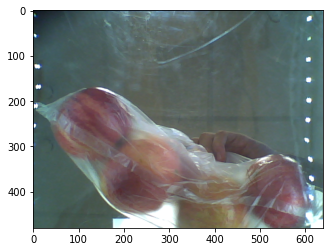

In [ ]:
img=image.load_img("/content/drive/My Drive/Allripe/479364_937965_bundle_archive/TRAIN/gala/1_20190917130459_389.png")
plt.imshow(img)

reading the size of images

In [ ]:
cv2.imread("/content/drive/My Drive/Allripe/479364_937965_bundle_archive/TRAIN/gala/1_20190917130459_389.png").shape

(480, 640, 3)

rescaling train & test images using ImageDataGenerator



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

preparing train images

In [ ]:
train_dataset= train.flow_from_directory('/content/drive/My Drive/Allripe/479364_937965_bundle_archive/TRAIN/',
                                         target_size=(299, 299),
                                         class_mode='categorical')

Found 5658 images belonging to 15 classes.


preparing test images

In [ ]:
test_dataset= test.flow_from_directory('/content/drive/My Drive/Allripe/479364_937965_bundle_archive/TEST/',
                                         target_size=(299, 299),
                                         class_mode='categorical')

Found 135 images belonging to 15 classes.


# **True information of the dataset**

### **Categories of Train & Test Datasets**

In [ ]:
train_dataset.class_indices

{'bananas': 0,
 'cucumber_prickly': 1,
 'gala': 2,
 'golden': 3,
 'granny_smith': 4,
 'grape_black': 5,
 'grapefruit_yellow': 6,
 'lady_fingers': 7,
 'lemon': 8,
 'mandarin': 9,
 'orange': 10,
 'pepper_red': 11,
 'pepper_yellow': 12,
 'sultana': 13,
 'tomato_plum': 14}

Here, we got 15 classes

In [ ]:
type(train_dataset.class_indices)

dict

In [ ]:
train_dataset.class_indices.keys()

dict_keys(['bananas', 'cucumber_prickly', 'gala', 'golden', 'granny_smith', 'grape_black', 'grapefruit_yellow', 'lady_fingers', 'lemon', 'mandarin', 'orange', 'pepper_red', 'pepper_yellow', 'sultana', 'tomato_plum'])

In [ ]:
train_dataset.class_indices.values()


dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

### 1) Train Dataset

In [ ]:
print("There are 5658 train images which belong to 15 categories.")

There are 5658 train images which belong to 15 categories.


In [ ]:
train_dataset.classes

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int32)

In [ ]:
type(train_dataset.classes)

numpy.ndarray

checking number of images for every class/category in train dataset

In [ ]:
import numpy as np

x = train_dataset.classes
unique, counts = np.unique(x, return_counts=True)

print (np.asarray((unique, counts)).T)

[[  0 707]
 [  1 688]
 [  2 591]
 [  3 285]
 [  4 439]
 [  5 218]
 [  6 202]
 [  7 179]
 [  8 753]
 [  9 128]
 [ 10  62]
 [ 11 128]
 [ 12 174]
 [ 13 549]
 [ 14 555]]


In [ ]:
type(np.asarray((unique, counts)))

numpy.ndarray

In [ ]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32)

In [ ]:
counts

array([707, 688, 591, 285, 439, 218, 202, 179, 753, 128,  62, 128, 174,
       549, 555])

presenting actual number of images of each class in train dataset

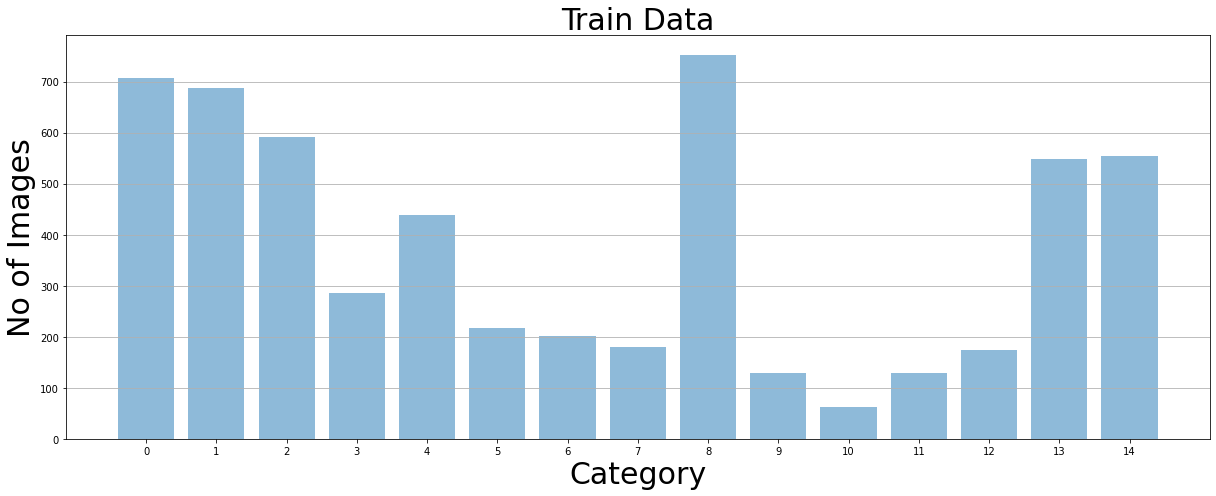

In [ ]:
# Build the plot
fig, ax = plt.subplots(figsize=(17, 7))

ax.bar(unique,counts, align='center', alpha=0.5)
ax.set_xlabel('Category',fontsize=30)
ax.set_ylabel('No of Images',fontsize=30)
ax.set_xticks(unique)
ax.set_xticklabels(unique)
ax.set_title('Train Data',fontsize=30)
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.show()

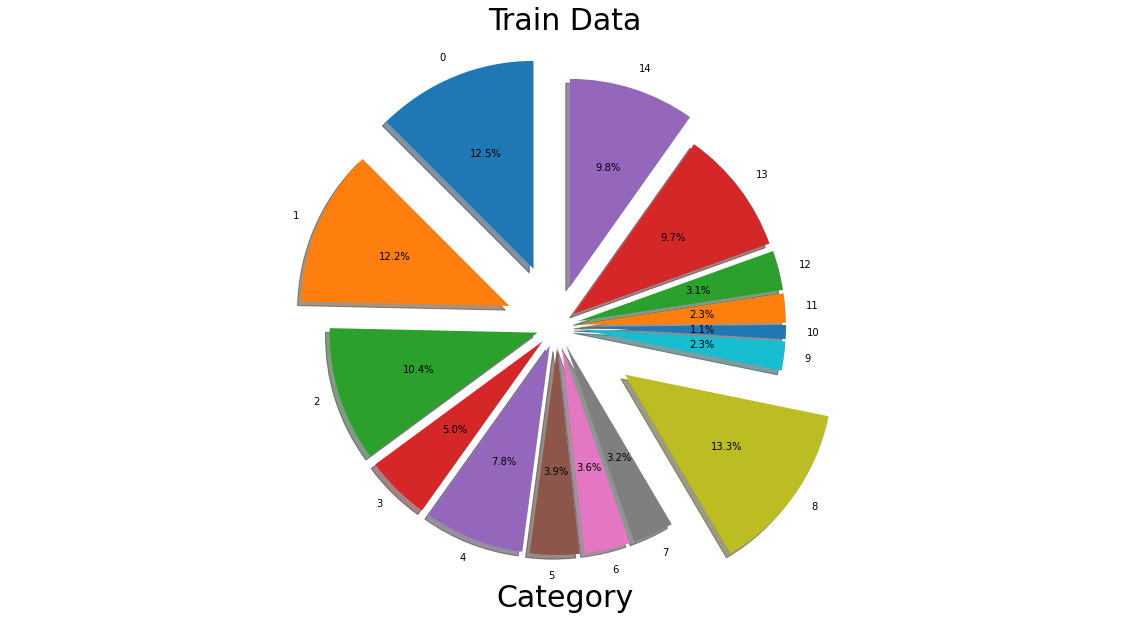

In [ ]:
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.3, 0.25, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.4, 0.1, 0.1, 0.1,0.1, 0.1, 0.2)

fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(counts,
       explode=explode,
       labels=unique,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.set_xlabel('Category',fontsize=30)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Train Data',fontsize=30)


plt.show()

Hence, maximum number of images belong to `lemon`, followed by `bananas`, & `cucumber_prickly`. That means probability of predicting these 3 images is significantly high. 

### 2) Test Dataset

In [ ]:
print("There are 135 test images which belong to 15 categories.")

There are 135 test images which belong to 15 categories.


In [ ]:
test_dataset.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14],
      dtype=int32)

In [ ]:
type(test_dataset.classes)

numpy.ndarray

In [ ]:
import numpy as np

x = test_dataset.classes
unique, counts = np.unique(x, return_counts=True)

print (np.asarray((unique, counts)).T)

[[ 0  9]
 [ 1  9]
 [ 2  9]
 [ 3  9]
 [ 4  9]
 [ 5  9]
 [ 6  9]
 [ 7  9]
 [ 8  9]
 [ 9  9]
 [10  9]
 [11  9]
 [12  9]
 [13  9]
 [14  9]]


In [ ]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32)

In [ ]:
counts

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

presenting actual number of images of each class in test dataset

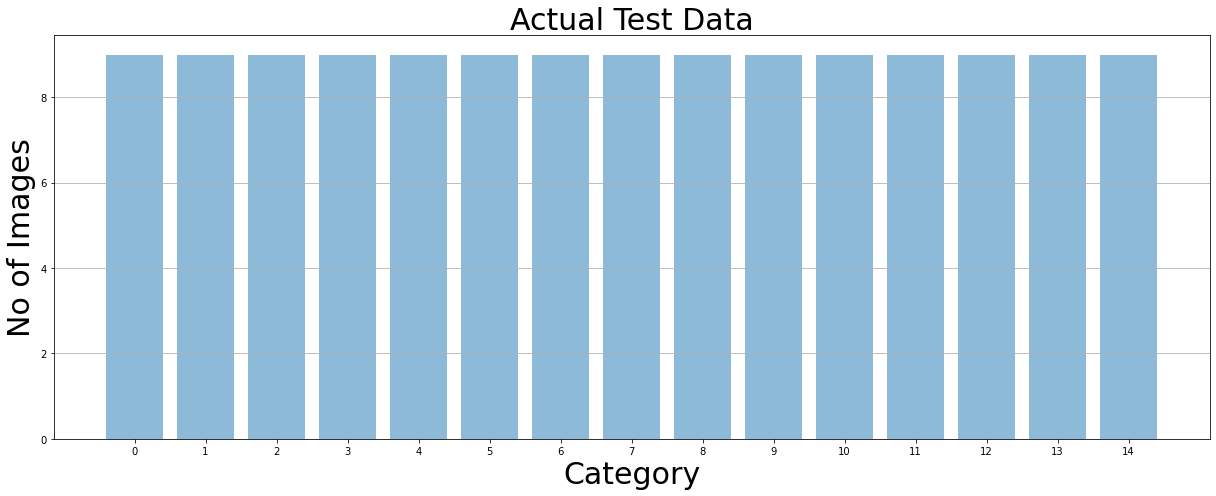

In [ ]:
# Build the plot
fig, ax = plt.subplots(figsize=(17, 7))

ax.bar(unique,counts, align='center', alpha=0.5)
ax.set_xlabel('Category',fontsize=30)
ax.set_ylabel('No of Images',fontsize=30)
ax.set_xticks(unique)
ax.set_xticklabels(unique)
ax.set_title('Actual Test Data',fontsize=30)
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.show()

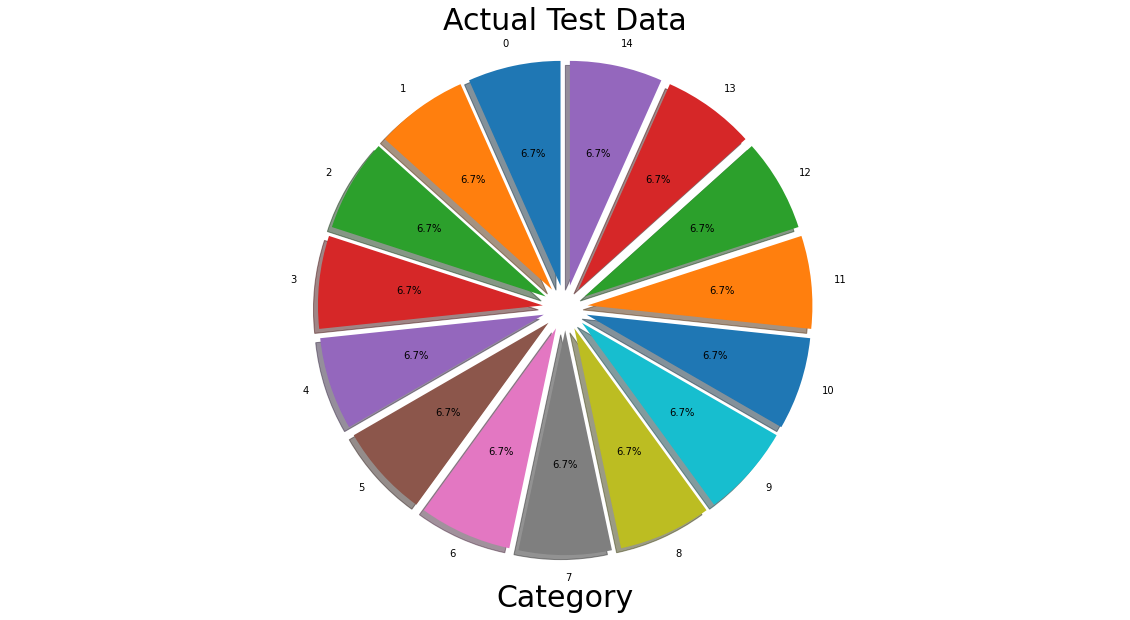

In [ ]:

# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(counts,
       explode=explode,
       labels=unique,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.set_xlabel('Category',fontsize=30)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Actual Test Data',fontsize=30)


plt.show()

Hence, all 15 types of images in test dataset are present in equal proportion i.e. 6.7%. 

# **Predicted information of the dataset**

### Least Probability of predicting an image correctly

In [ ]:
round(1/15*100,1)

6.7

Keras Model Building using a Pretrained Model (Transfer Learning) i.e. `InceptionV3`

In [ ]:
from keras.models import Model 
from keras.layers import Dropout, Dense, BatchNormalization
from keras.applications.inception_v3 import InceptionV3




def build_model(num_features):
  base = InceptionV3(input_shape=(299, 299, 3),
                     weights='imagenet',
                     include_top=True
                     ) 
  
  # model top
  #x = base.output
  x= base.layers[-2].output
  #x = Dense(120, activation='relu')(x)
  #x = BatchNormalization()(x)
  #x = Dropout(0.45)(x)
  top = Dense(15, activation='softmax')(x)
  
  return Model(inputs=base.input, outputs=top)

finalizing the model and creating a summary of it. 

In [ ]:
model = build_model(num_features=299)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
____________________________________________________________________________________________



We are doing multiple categorization, so categorical_crossentropy is still the right loss function to use. We'll use the Adam optimizer.

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
'''for l, layer in enumerate(model.layers[:-1]):
    layer.trainable = False'''

In [ ]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0003),metrics=["accuracy"])

And now we train our model

In [ ]:
history=model.fit(train_dataset,epochs = 10, validation_data= (test_dataset))

Epoch 1/10
177/177 [==============================] - 106s 599ms/step - loss: 0.2365 - accuracy: 0.9259 - val_loss: 0.3054 - val_accuracy: 0.6593
Epoch 2/10
177/177 [==============================] - 91s 513ms/step - loss: 0.0609 - accuracy: 0.9820 - val_loss: 0.5987 - val_accuracy: 0.7556
Epoch 3/10
177/177 [==============================] - 93s 523ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 1.1952 - val_accuracy: 0.8000
Epoch 4/10
177/177 [==============================] - 94s 532ms/step - loss: 0.0204 - accuracy: 0.9943 - val_loss: 0.2292 - val_accuracy: 0.8593
Epoch 5/10
177/177 [==============================] - 93s 525ms/step - loss: 0.0228 - accuracy: 0.9947 - val_loss: 0.4721 - val_accuracy: 0.7778
Epoch 6/10
177/177 [==============================] - 92s 521ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.8070 - val_accuracy: 0.7630
Epoch 7/10
177/177 [==============================] - 91s 517ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 2.0540 - val_a

Let's plot the validation loss and validation accuracy over time.

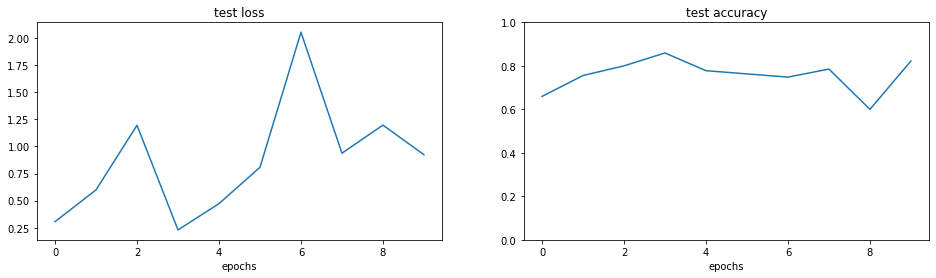

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("test loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("test accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Above we achieved top-5 accuracy of 86%.
Now, we'll predict `test images`

In [ ]:
y_prob = model.predict(test_dataset)
y_prob

array([[1.9201225e-12, 5.2508825e-10, 9.9987578e-01, ..., 2.5844727e-08,
        2.2830033e-09, 1.4111550e-06],
       [1.3237043e-09, 2.6029521e-09, 2.6292275e-03, ..., 1.2738057e-08,
        2.9838212e-09, 6.7080341e-06],
       [4.2451240e-05, 1.5504773e-02, 3.4738815e-04, ..., 2.8780929e-05,
        3.4334291e-05, 1.6507114e-05],
       ...,
       [1.7648272e-03, 4.4337565e-08, 2.5093021e-08, ..., 9.8465145e-01,
        1.9477984e-07, 7.1247301e-09],
       [7.0702072e-08, 3.0052881e-08, 4.8422063e-04, ..., 2.3260979e-07,
        2.5291186e-08, 9.1774846e-06],
       [6.3960836e-03, 2.8746699e-06, 5.6973586e-06, ..., 5.3503805e-01,
        9.0454860e-06, 3.4854370e-06]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([ 2, 10,  5, 10,  6,  1,  1,  1, 13,  3,  6,  1,  6,  4, 13,  4, 11,
        6,  3,  6, 11,  1, 13,  3,  3,  1, 13, 13,  6, 13,  5, 11,  1, 11,
        9,  5,  6,  0, 10,  3,  6, 11,  6,  4,  1, 13,  3,  1,  0,  5,  9,
        4,  6,  2, 13,  6,  4,  0, 13,  2, 10,  9,  6,  4,  1,  3,  9,  9,
       14, 14, 14,  9,  0,  0,  0, 11,  6,  8, 10,  0, 11,  6, 14, 11,  1,
        1, 14,  2, 12, 10,  6, 12,  6, 13, 14,  6, 13,  4, 12, 10, 14,  6,
       14,  0, 13,  4, 13, 13,  0,  2,  5,  3,  9, 13, 14, 10,  6,  2, 12,
        9,  0, 13,  2,  2, 11, 13,  6,  9,  3,  1,  4,  2, 12, 10, 12])

`y_pred` is the predicted values of test dataset images.

In [ ]:
import numpy as np

x = y_pred
unique, counts = np.unique(x, return_counts=True)

print (np.asarray((unique, counts)).T)

[[ 0 10]
 [ 1 13]
 [ 2  9]
 [ 3  9]
 [ 4  9]
 [ 5  5]
 [ 6 20]
 [ 8  1]
 [ 9  9]
 [10  9]
 [11  9]
 [12  6]
 [13 17]
 [14  9]]


In [ ]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
counts

array([10, 13,  9,  9,  9,  5, 20,  1,  9,  9,  9,  6, 17,  9])

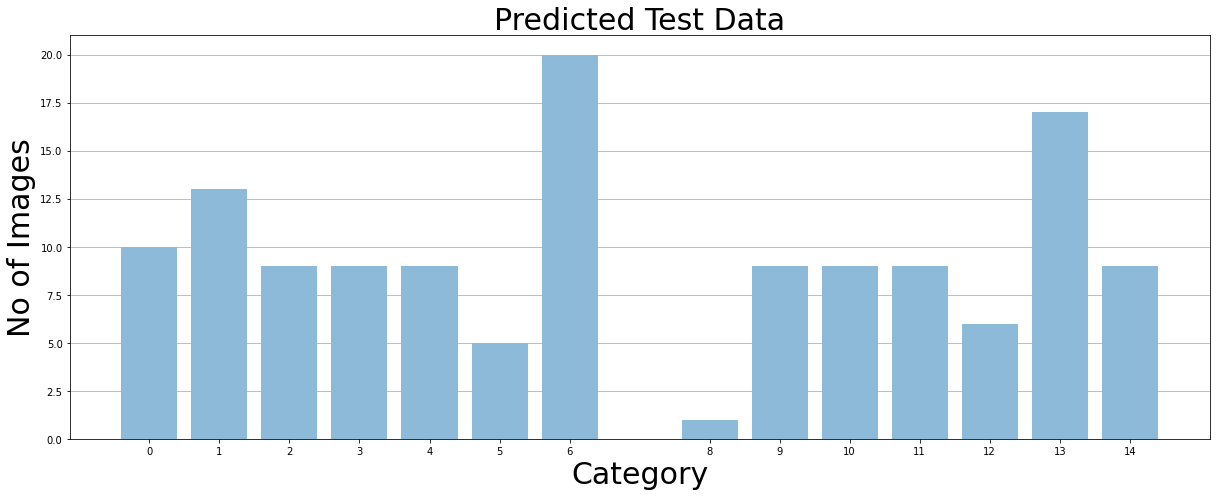

In [ ]:
# Build the plot
fig, ax = plt.subplots(figsize=(17, 7))

ax.bar(unique,counts, align='center', alpha=0.5)
ax.set_xlabel('Category',fontsize=30)
ax.set_ylabel('No of Images',fontsize=30)
ax.set_xticks(unique)
ax.set_xticklabels(unique)
ax.set_title('Predicted Test Data',fontsize=30)
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.show()

So, most of the images are predicted as `grapefruit_yellow` & `sultana`. However, no image is predicted as `lady_fingers`.

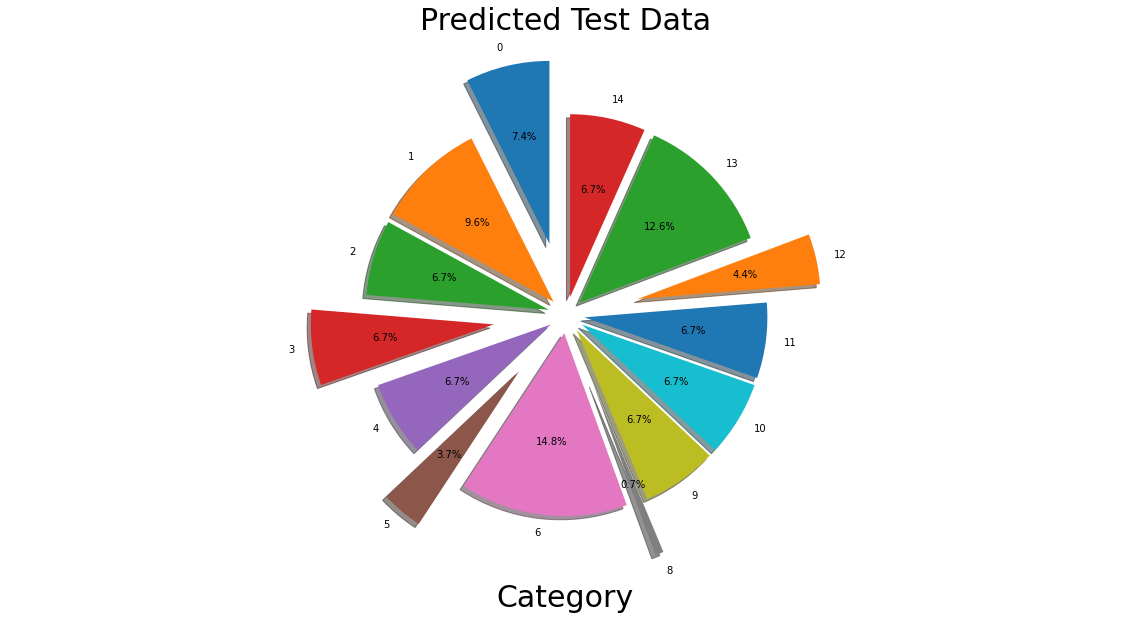

In [ ]:
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.4, 0.1, 0.1, 0.4,0.1, 0.4, 0.1, 0.4,0.1, 0.1, 0.1, 0.4,0.1, 0.1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(counts,
       explode=explode,
       labels=unique,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.set_xlabel('Category',fontsize=30)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Predicted Test Data',fontsize=30)


plt.show()

* Therefore, `gala`, `golden`, `granny_smith`, `mandarin`, `orange`, `pepper_red`, & `tomato_plum` are predicted exactly in the same proportion as they were present in actual `test dataset`. 

* The actual proportion of every image class was `6.7%`. 

* Classes `grapefruit_yellow`, `sultana`, `cucumber_prickly`, & `bananas` are predicted in a much more proportion then their actual proportion (6.7%). 

* However, `grape_black`, `lemon`, & `pepper_yellow` are predicted in comparatively less proportion as per the actual proportion of every class i.e. 6.7%. 

* Not even a single image is predicted as `lady_fingers`.

## **Conclusion**
It's really hard to predict `lady_fingers`, `lemon`, & `grape_black` correctly.